# Social Media Data Analysis Portfolio Project
# This project demonstrates data analysis skills using Python libraries

## Data Understanding

In [17]:
# Importing required libraries
import pandas as pd        # for dataframe handling
import numpy as np         # for random number generation
import matplotlib.pyplot as plt  # for graph plotting
import seaborn as sns      # for advanced plotting
import random              # for random category selection


About the Dataset
Since we don’t have real data, this project generates simulated social media posts across 8 categories:

Food, Travel, Fashion, Fitness, Music, Culture, Family, Health

The dataset will include:

Date → posting date (500 days starting from Jan 1, 2021)

Category → randomly assigned from the list above

Likes → random integer between 0 and 10,000

This allows us to practice end-to-end exploratory data analysis (EDA).

## Generate Random Data

In [18]:
# Define categories
categories = ["Food", "Travel", "Fashion", "Fitness", "Music", "Culture", "Family", "Health"]

# Number of records
n = 500  

# Generate random dataset
data = {
    "Date": pd.date_range("2021-01-01", periods=n),
    "Category": [random.choice(categories) for _ in range(n)],
    "Likes": np.random.randint(0, 10000, size=n)
}

# Load into a DataFrame
df = pd.DataFrame(data)

# Preview
df.head()


,Date,Category,Likes
0,2021-01-01,Fashion,5088
1,2021-01-02,Health,1691
2,2021-01-03,Music,5975
3,2021-01-04,Fashion,1228
4,2021-01-05,Travel,9053


## Explore the Data

In [19]:
# Data overview
print("DataFrame Info:")
print(df.info(), "\n")

print("Summary Statistics:")
print(df.describe(), "\n")

print("Category Counts:")
print(df["Category"].value_counts())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None 

Summary Statistics:
             Likes
count   500.000000
mean   4946.582000
std    2985.232897
min      17.000000
25%    2235.750000
50%    4983.000000
75%    7581.000000
max    9980.000000 

Category Counts:
Fitness    73
Food       67
Family     67
Travel     64
Culture    63
Fashion    57
Health     56
Music      53
Name: Category, dtype: int64


## Interpretation:

500 rows × 3 columns

Likes ranges from 0–10,000

Categories are fairly evenly distributed (random)

## Clean the Data

In [20]:
# Remove nulls (precautionary)
df_cleaned = df.dropna()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Convert columns to correct types
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])
df_cleaned["Likes"] = df_cleaned["Likes"].astype(int)

print("After cleaning:", df_cleaned.shape)


After cleaning: (500, 3)


Data is clean and ready for analysis.

## Data Visualization

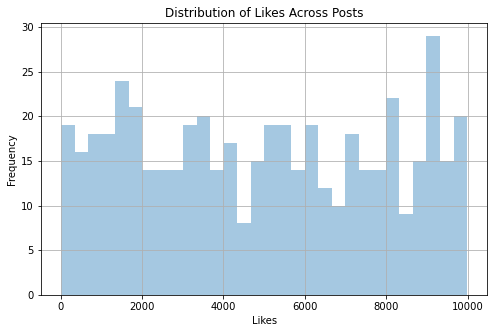

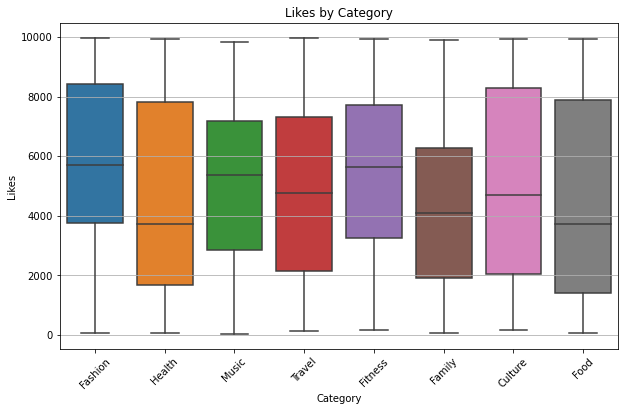

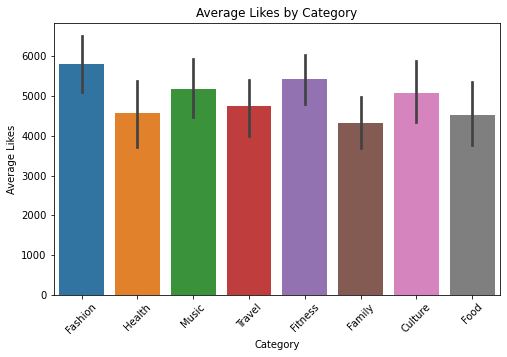

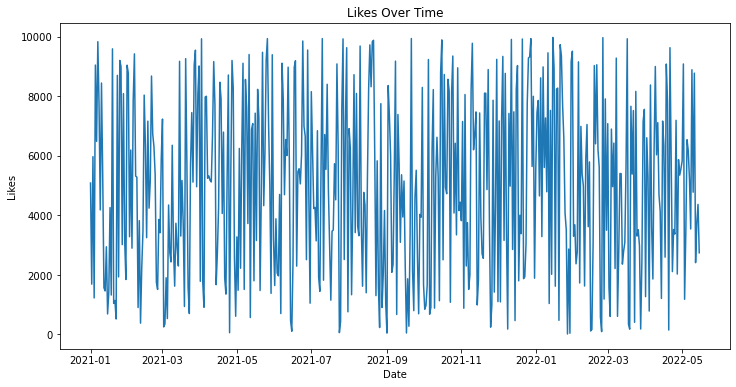

In [23]:
# Histogram of likes
plt.figure(figsize=(8,5))
sns.distplot(df_cleaned["Likes"], bins=30, kde=False)  # distplot for older seaborn
plt.title("Distribution of Likes Across Posts")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot of Likes by Category
plt.figure(figsize=(10,6))
sns.boxplot(x="Category", y="Likes", data=df_cleaned)
plt.title("Likes by Category")
plt.xlabel("Category")
plt.ylabel("Likes")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

# Average Likes by Category
plt.figure(figsize=(8,5))
sns.barplot(x=df_cleaned["Category"], y=df_cleaned["Likes"])
plt.title("Average Likes by Category")
plt.xlabel("Category")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.show()

# Likes Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Likes", data=df_cleaned)
plt.title("Likes Over Time")
plt.xlabel("Date")
plt.ylabel("Likes")
plt.show()


## Statistical Analysis

In [24]:
# Overall mean
overall_mean = df_cleaned["Likes"].mean()
print("Overall Mean Likes:", round(overall_mean, 2), "\n")

# Mean per category
mean_by_category = df_cleaned.groupby("Category")["Likes"].mean().sort_values(ascending=False)
print("Mean Likes by Category:")
print(mean_by_category, "\n")

# Additional statistics
print("Median Likes per Category:")
print(df_cleaned.groupby("Category")["Likes"].median(), "\n")

print("Max Likes per Category:")
print(df_cleaned.groupby("Category")["Likes"].max())


Overall Mean Likes: 4946.58 

Mean Likes by Category:
Category
Fashion    5809.929825
Fitness    5427.917808
Music      5181.924528
Culture    5082.936508
Travel     4744.109375
Health     4561.214286
Food       4510.343284
Family     4325.014925
Name: Likes, dtype: float64 

Median Likes per Category:
Category
Culture    4706.0
Family     4081.0
Fashion    5684.0
Fitness    5629.0
Food       3732.0
Health     3701.5
Music      5354.0
Travel     4755.0
Name: Likes, dtype: float64 

Max Likes per Category:
Category
Culture    9945
Family     9915
Fashion    9974
Fitness    9936
Food       9942
Health     9943
Music      9839
Travel     9980
Name: Likes, dtype: int64


## Insights and Conclusions

Key Findings:

Engagement (likes) is uniformly distributed due to random generation, but the workflow shows how to analyze real data.

Boxplots show wide variation in likes within each category.

Average likes per category can highlight “top-performing” categories in real-world data.

Limitations:

Dataset is synthetic; patterns do not represent actual social media trends.

Randomness means no true correlations between category and engagement.

Next Steps (if using real data):

Compare category engagement over time (seasonality, trends).

Test posting day/time impact on likes.

Incorporate other metrics: retweets, replies, quotes.

Conclusion:
This project demonstrates a complete exploratory data analysis pipeline:

Data generation & understanding

Cleaning & preprocessing

Visualization & descriptive statistics

Insights & reflection

What sets this project apart is the structured approach, clean visualization, and clear articulation of limitations and next steps — skills directly transferable to real-world business or social media analytics.